In [14]:
# To Start

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

import pandas as pd
from pandas import *

In [16]:
# import penguins
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [45]:
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [46]:
# using all the predictors; predict bill_depth_mm

X=penguins.drop('bill_depth_mm', axis=1)
y= penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train.head()

,species,island,bill_length_mm,flipper_length_mm,body_mass_g,sex,year
223,Gentoo,Biscoe,46.4,221.0,5000.0,male,2008
209,Gentoo,Biscoe,45.5,220.0,5000.0,male,2008
71,Adelie,Torgersen,39.7,190.0,3900.0,male,2008
235,Gentoo,Biscoe,50.0,224.0,5350.0,male,2009
301,Chinstrap,Dream,52.0,197.0,4150.0,male,2007


In [47]:
# Dummifying

# 1. name the LR and OHE functions for ease
lr = LinearRegression()
enc = OneHotEncoder()

# 2. name the column transformer, listing what will be dummified
ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

# 3. assigning the pipeline
my_pipeline = Pipeline(
  [('dummify_everything',ct), ('ols', lr)]
)

# transformation
enc.fit_transform(penguins)

<333x400 sparse matrix of type '<class 'numpy.float64'>'
	with 2664 stored elements in Compressed Sparse Row format>

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Model 1

In [48]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [49]:
# Model 1: all predictors
y_test_preds = fitted_pipeline.predict(X_test)
y_train_preds = fitted_pipeline.predict(X_train)

# R-squared
r2_test_model1 = r2_score(y_test, y_test_preds)
print(r2_test_model1)

r2_train_model1 = r2_score(y_train, y_train_preds)
print(r2_train_model1)

0.8021822190898245
0.8297978869599615


Model 2

In [50]:
# Model 2: bill depth, flipper length
X= penguins[['bill_length_mm','flipper_length_mm']]
y= penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

my_pipeline_2 = Pipeline(
  [('ols', lr)]
)

my_pipeline_2.fit(X_train, y_train)
y_test_preds = my_pipeline_2.predict(X_test)
y_train_preds = my_pipeline_2.predict(X_train)

# R-squared
r2_test_model2 = r2_score(y_test, y_test_preds)
print(r2_test_model2)

r2_train_model2 = r2_score(y_train, y_train_preds)
print(r2_train_model2)

0.3474306131922461
0.3812569674977758


Model 3

In [51]:
# Model 3: species, island, bill length, flipper length, body mass

X= penguins[['species', 'island', 'bill_length_mm','flipper_length_mm', 'body_mass_g']]
y= penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_species", enc, ['species']),
     ("dummify_island", enc, ['island'])],
    remainder='passthrough'  # This will let other features pass through without transformation
)

my_pipeline_3 = Pipeline(
  [('dummify_everything',ct), ('ols', lr)]
)

my_pipeline_3.fit(X_train, y_train)

y_test_preds = my_pipeline_3.predict(X_test)
y_train_preds = my_pipeline_3.predict(X_train)

# R-squared
r2_test_model3 = r2_score(y_test, y_test_preds)
print(r2_test_model3)

r2_train_model3 = r2_score(y_train, y_train_preds)
print(r2_train_model3)

0.7740768083809421
0.8305332808879978


Model 4

In [52]:
# Model 4: flipper length, body mass, sex
X = penguins[['flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# 1. name the LR and OHE functions for ease
lr = LinearRegression()
enc = OneHotEncoder()

# 2. name the column transformer, listing what will be dummified
ct = ColumnTransformer(
    [("dummify_sex", enc, ['sex'])]
)

# 3. assigning the pipeline
my_pipeline_4 = Pipeline(
  [('dummify_everything', ct), ('ols', lr)]
)

# Fitting and predicting using the pipeline
my_pipeline_4.fit(X_train, y_train)
model4 = my_pipeline_4.predict(X_test)
y_train_preds = my_pipeline_4.predict(X_train)

# R-squared
r2_test_model4 = r2_score(y_test, model4)
print(r2_test_model4)

r2_train_model4 = r2_score(y_train, y_train_preds)
print(r2_train_model4)

0.12259309028659815
0.1428640369381048


The Plot

In [55]:
import pandas as pd

# 1. Initialize an empty DataFrame with the desired columns.


# 2. Rows for the DataFrame.
model_number = [1, 2, 3, 4]
num_predictors = [7, 2, 5, 3]
r2_test = [r2_test_model1, r2_test_model2, r2_test_model3, r2_test_model4]
r2_train = [r2_train_model1, r2_train_model2, r2_train_model3, r2_train_model4]

df = pd.DataFrame({'model': model_number, 'predictors': num_predictors, 'R2_test': r2_test, 'R2_train': r2_train})

df


,model,predictors,R2_test,R2_train
0,1,7,0.802182,0.829798
1,2,2,0.347431,0.381257
2,3,5,0.774077,0.830533
3,4,3,0.122593,0.142864


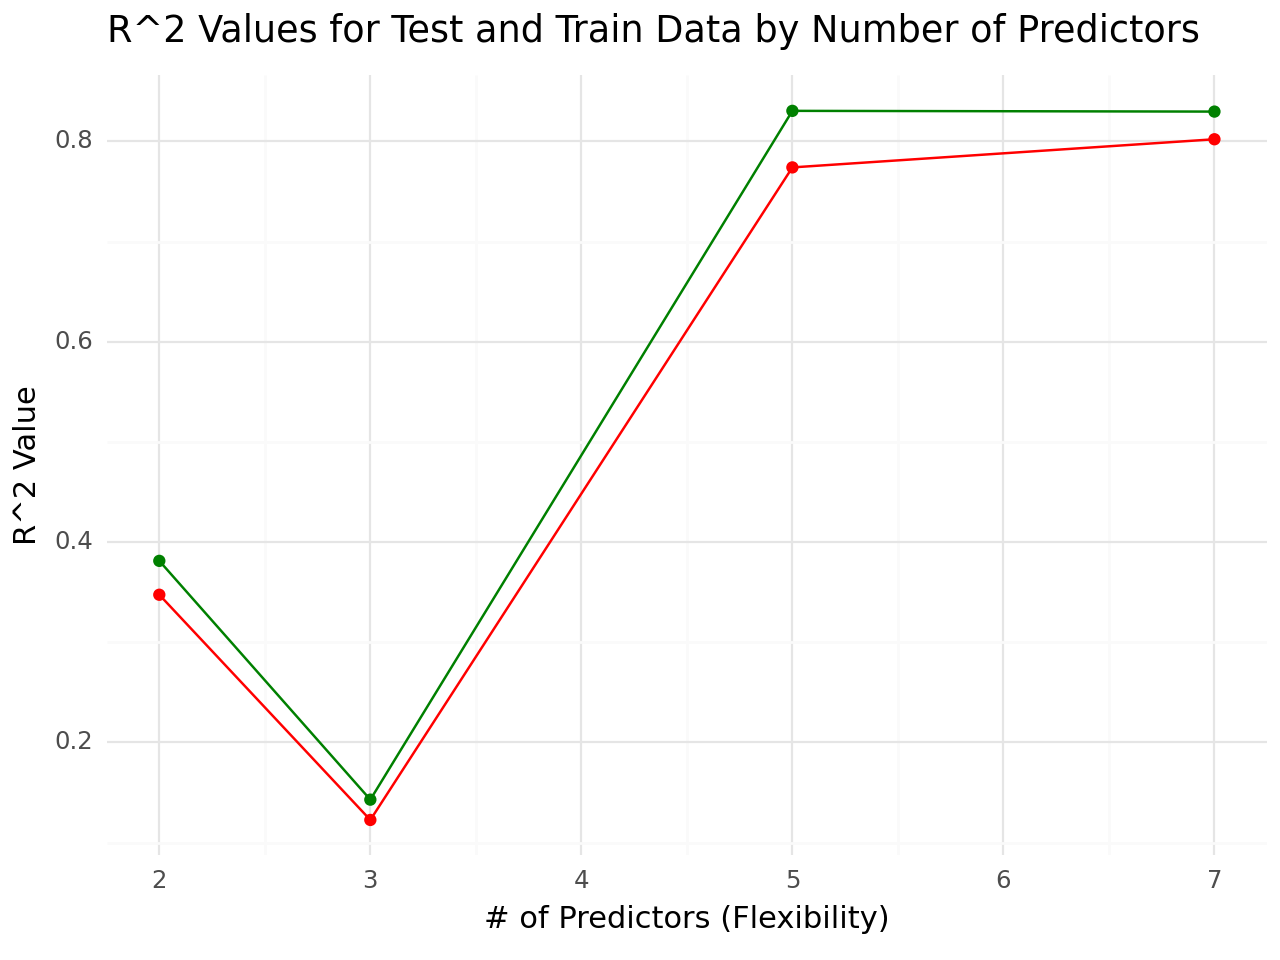

<Figure Size: (640 x 480)>

In [56]:
# Plot; where x is # of pred, y is r2 values (both test and train)

from plotnine import *

# Plotting
p = (ggplot(df, aes(x='predictors', y='R2_test'))
     + geom_line(color='red')
     + geom_point(aes(y='R2_test'), color='red')
     + geom_line(aes(y='R2_train'), color='green')
     + geom_point(aes(y='R2_train'), color='green')
     + labs(title="R^2 Values for Test and Train Data by Number of Predictors", x= "# of Predictors (Flexibility)", y="R^2 Value")
     + theme_minimal()
)
p


Interpretation/Analysis of the Graph:

- When the lines (green and red) are close together, this indicates that the model's performance on the training data is similar to its performance on the test data.

Therefore, there appears to be compatibility between the model's performance on the training and test datasets when there are about 2-4 predictors. This means that the model generalizes well and implies it's not overfitting the training data.

- When the lines (green and red) are farther apart, this suggests a lack of compatibility between the model's performance on the training and test datasets.

Therefore, there appears to be a lack of compatibility between the model's performance on the training and test datasets when there are about 5-7 predictors. This means there could be overfitting and that the model is too complex.